# WeatherPy

### Note

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [127]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import json

# For stat analysis later on
from scipy.stats import linregress

# API key
from api_keys import weather_api_key

# PIP install then import citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File to a CSV
output_data_file = "output_data/cities.csv"


### Generate Cities List

In [128]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Lists for lat_lngs and cities
lat_lngs = []
cities = []
#countries = []

# Create a set of random lat and lng combinations via np.random
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Fiding nearest city for each lat and lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [129]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=49986ef2e3493d7465d1b8ab56674b63'

In [130]:
# How to see json data and keys
weather_json = weather_response.json()
weather_json
print(json.dumps(weather_json, indent=4, sort_keys=True))
weather_json.keys()

{
    "city": {
        "coord": {
            "lat": -13.7333,
            "lon": 15.0667
        },
        "country": "AO",
        "id": 3351380,
        "name": "Caconda",
        "population": 10549,
        "sunrise": 1601354637,
        "sunset": 1601398550,
        "timezone": 3600
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 42
            },
            "dt": 1601413200,
            "dt_txt": "2020-09-29 21:00:00",
            "main": {
                "feels_like": 59.72,
                "grnd_level": 833,
                "humidity": 59,
                "pressure": 1013,
                "sea_level": 1013,
                "temp": 64.04,
                "temp_kf": 3.99,
                "temp_max": 64.04,
                "temp_min": 56.86
            },
            "pop": 0,
            "sys": {
                "pod": "n"
            },
            "visibility": 10000,
            "weather": [
                {


dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [131]:
weather_response = requests.get(target_url)
weather_response

<Response [200]>

In [132]:
#print(weather_json['city']['name'])
print(weather_json['city']['name'])

Caconda


In [133]:
# set up lists to hold reponse info
# Need temperature, humidity, cloudiness, and windspeed
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

    
# Loop through the list of cities and perform a request for data on each + append

for city in cities:
    # Add correct unit type 'Imperial'
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        # Review json keys to aquire correct info
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        # Print responses
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass



Processing record 1 of Set 1 | sisimiut
Processing record 2 of Set 1 | hobart
Processing record 3 of Set 1 | bluff
Processing record 4 of Set 1 | mar del plata
Processing record 5 of Set 1 | east london
Processing record 6 of Set 1 | castro
Processing record 7 of Set 1 | bafoulabe
Processing record 8 of Set 1 | albany
Processing record 9 of Set 1 | hay river
Processing record 10 of Set 1 | sao jose da coroa grande
Processing record 11 of Set 1 | longyearbyen
Processing record 12 of Set 1 | kongoussi
Processing record 13 of Set 1 | vaini
Processing record 14 of Set 1 | husavik
Processing record 15 of Set 1 | hilo
Processing record 16 of Set 1 | tabas
Processing record 17 of Set 1 | jieshi
Processing record 18 of Set 1 | provideniya
Processing record 19 of Set 1 | jamestown
Processing record 20 of Set 1 | bubaque
Processing record 21 of Set 1 | rikitea
Record not found
Processing record 22 of Set 1 | george
Record not found
Processing record 23 of Set 1 | harper
Processing record 24 of S

Processing record 188 of Set 1 | sampit
Processing record 189 of Set 1 | verkhnetulomskiy
Processing record 190 of Set 1 | salinas
Processing record 191 of Set 1 | gongzhuling
Processing record 192 of Set 1 | flin flon
Processing record 193 of Set 1 | le marin
Processing record 194 of Set 1 | grand-santi
Processing record 195 of Set 1 | khasan
Processing record 196 of Set 1 | yumen
Processing record 197 of Set 1 | zhigansk
Processing record 198 of Set 1 | vardo
Processing record 199 of Set 1 | saldanha
Processing record 200 of Set 1 | ribeira grande
Processing record 201 of Set 1 | barcelona
Processing record 202 of Set 1 | russell
Processing record 203 of Set 1 | sola
Processing record 204 of Set 1 | marsh harbour
Processing record 205 of Set 1 | kasongo-lunda
Processing record 206 of Set 1 | ponta do sol
Processing record 207 of Set 1 | impfondo
Processing record 208 of Set 1 | kruisfontein
Processing record 209 of Set 1 | grand-lahou
Processing record 210 of Set 1 | severnoye
Proces

Processing record 377 of Set 1 | lavrentiya
Processing record 378 of Set 1 | shahgarh
Processing record 379 of Set 1 | lata
Processing record 380 of Set 1 | mizdah
Processing record 381 of Set 1 | mahibadhoo
Record not found
Processing record 382 of Set 1 | touros
Processing record 383 of Set 1 | golub-dobrzyn
Processing record 384 of Set 1 | aosta
Processing record 385 of Set 1 | masterton
Processing record 386 of Set 1 | quilmana
Processing record 387 of Set 1 | bowling green
Processing record 388 of Set 1 | kingisepp
Processing record 389 of Set 1 | skjervoy
Processing record 390 of Set 1 | vysokogornyy
Processing record 391 of Set 1 | honningsvag
Processing record 392 of Set 1 | ancud
Processing record 393 of Set 1 | verkhnevilyuysk
Processing record 394 of Set 1 | mporokoso
Processing record 395 of Set 1 | atambua
Processing record 396 of Set 1 | ostrovnoy
Processing record 397 of Set 1 | zambezi
Processing record 398 of Set 1 | vila velha
Processing record 399 of Set 1 | opuwo
Pr

### Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [134]:
# Creating dataframe
weather_df = {"Country":country,
              "City": cityname,
              "Latitude": lat, 
              "Longitude":lng,
                "Max Temp":max_temp,
              "Humidity":humidity,
              "Cloudiness":cloudiness,
                "Wind Speed":wind_speed,
              "Date":date}
weather_data = pd.DataFrame(weather_df)
weather_data.head()

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,GL,Sisimiut,66.9395,-53.6735,31.71,92,96,2.26,1601424000
1,AU,Hobart,-42.8794,147.3294,59.31,63,95,9.33,1601424000
2,NZ,Bluff,-46.6000,168.3333,45.32,90,98,17.47,1601424000
3,AR,Mar del Plata,-38.0023,-57.5575,64.51,58,24,13.96,1601424000
4,ZA,East London,-33.0153,27.9116,59.56,66,96,0.09,1601424000


In [135]:
# Exporting city data into a csv
weather_data.to_csv(r'output_data\my_weather_data.csv')

### Inspect the data and remove the cities where the humidity > 100%.

In [136]:
# Created clean df however, there is no humidty value great than 100%
clean_df = weather_data.loc[weather_data['Humidity'] <= 100]
clean_df

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,GL,Sisimiut,66.9395,-53.6735,31.71,92,96,2.26,1601424000
1,AU,Hobart,-42.8794,147.3294,59.31,63,95,9.33,1601424000
2,NZ,Bluff,-46.6000,168.3333,45.32,90,98,17.47,1601424000
3,AR,Mar del Plata,-38.0023,-57.5575,64.51,58,24,13.96,1601424000
4,ZA,East London,-33.0153,27.9116,59.56,66,96,0.09,1601424000
...,...,...,...,...,...,...,...,...,...
548,DE,Neufahrn,48.2500,12.4333,49.98,93,97,5.01,1601424000
549,RU,Ust-Nera,64.5667,143.2000,42.01,70,94,8.25,1601424000
550,PE,San Isidro,-12.1167,-77.0500,63.70,75,52,9.78,1601424000
551,BB,Bathsheba,13.2167,-59.5167,83.01,83,58,17.78,1601424000


### Plotting the Data

- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

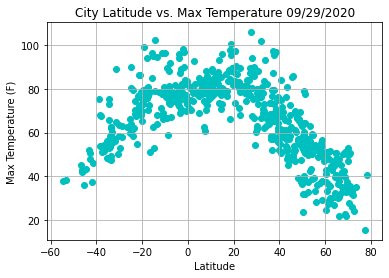

The Scatter plot is analyzing max temps of each city and it's latitude.


In [196]:
scatter_lat = weather_data["Latitude"]
scatter_temp = weather_data["Max Temp"]

# Creating the plot, formating, and priting
plt.scatter(scatlat,scattemp, color = "c", marker='o')
plt.title('City Latitude vs. Max Temperature 09/29/2020')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplot_latitude_max_temp')
plt.grid(True)
plt.show()
print("The Scatter plot is analyzing max temps of each city and it's latitude.")

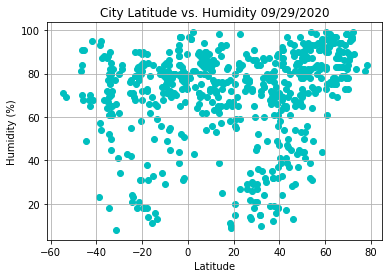

The Scatter plot is analyzing humidity of each city and it's latitude


In [197]:
scatter_humidity = weather_data["Humidity"]

# Creating the plot, formating, and priting
plt.scatter(scatlat,scathum, color = "c", marker='o')
plt.title('City Latitude vs. Humidity 09/29/2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplot_latitude_humidity')
plt.grid(True)
plt.show()
print("The Scatter plot is analyzing humidity of each city and it's latitude")

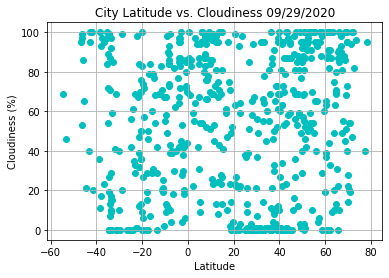

The Scatter plot is analyzing cloudiness of each city and it's latitude


In [198]:
scatter_cloud = weather_data["Cloudiness"]

# Creating the plot, formating, and priting
plt.scatter(scatlat,scatcloud, color = "c", marker='o')
plt.title('City Latitude vs. Cloudiness 09/29/2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplot_latitude_cloudiness')
plt.grid(True)
plt.show()
print ("The Scatter plot is analyzing cloudiness of each city and it's latitude")

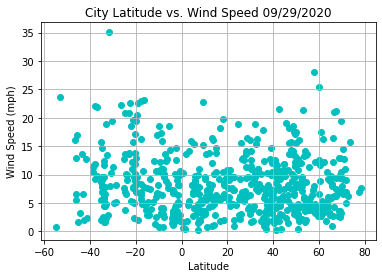

The Scatter plot is analyzing wind speed of each city and it's latitude


In [199]:
scatter_wind_speed = weather_data["Wind Speed"]

# Creating the plot, formating, and priting
plt.scatter(scatlat,scatwindsp, color = "c", marker='o')
plt.title('City Latitude vs. Wind Speed 09/29/2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplot_latitude_windspeed')
plt.grid(True)
plt.show()
print("The Scatter plot is analyzing wind speed of each city and it's latitude")

## Linear Regression
- #Northern Hemisphere - Temperature (F) vs. Latitude
- Southern Hemisphere - Temperature (F) vs. Latitude
- Northern Hemisphere - Humidity (%) vs. Latitude
- Southern Hemisphere - Humidity (%) vs. Latitude
- Northern Hemisphere - Cloudiness (%) vs. Latitude
- Southern Hemisphere - Cloudiness (%) vs. Latitude
- Northern Hemisphere - Wind Speed (mph) vs. Latitude
- Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [158]:
# Creating Linear regression function

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Structure of line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Similiar format as scatter
    plt.scatter(x_values,y_values,)
    plt.plot(x_values,regress_values,"r-")
    
    # Adding the line of the regression
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    # Print r-squared
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [159]:
# Creating Northern and Southern dfs. Use .loc + conidtional statemnt
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,GL,Sisimiut,66.9395,-53.6735,31.71,92,96,2.26,1601424000
6,ML,Bafoulabé,13.8065,-10.8321,82.09,69,98,0.51,1601424000
7,US,Albany,42.6001,-73.9662,61.00,84,85,5.41,1601424000
8,CA,Hay River,60.8156,-115.7999,49.23,74,87,15.86,1601424000
10,SJ,Longyearbyen,78.2186,15.6401,42.91,82,87,14.54,1601424000


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.818029068950245


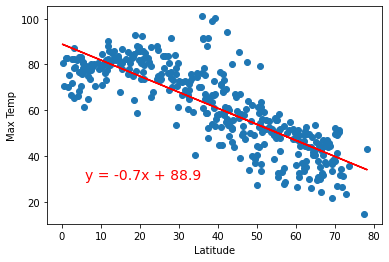

<Figure size 432x288 with 0 Axes>

In [184]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))


plt.savefig('northern_temperature_lat')

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7631341398647172


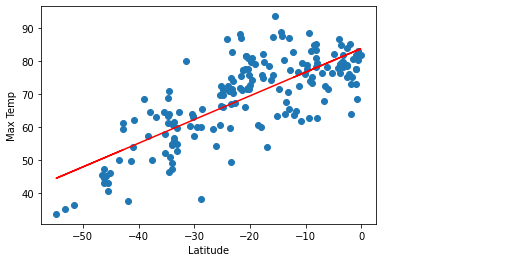

The regression model accounts for 82.0% of the variance in the northern hemisphere and 76.0% of the variance in the southern hemisphere. This indicates a strong correlation between latitutde and max temperature.


<Figure size 432x288 with 0 Axes>

In [185]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southern_temperature_lat')

print("The regression model accounts for 82.0% of the variance in the northern hemisphere and 76.0% of the variance in the southern hemisphere. This indicates a strong correlation between latitutde and max temperature.")


### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12056576875964532


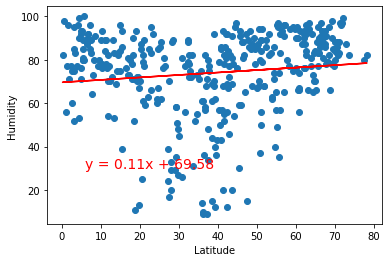

<Figure size 432x288 with 0 Axes>

In [186]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northern_humidity_lat')



### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16299126250256024


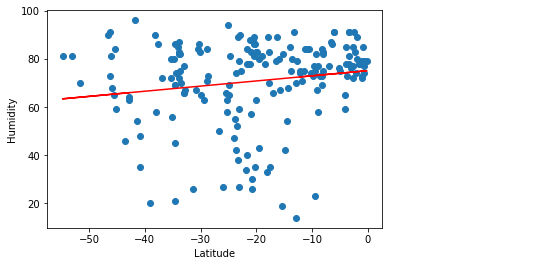

The linear regression model for both northern and southern hemsiphere indicates a small r value. There is a very weak correlation between humidity and latitude


<Figure size 432x288 with 0 Axes>

In [187]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southern_humidity_lat')

print("The linear regression model for both northern and southern hemsiphere indicates a small r value. There is a very weak correlation between humidity and latitude")

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 3.131256710783796e-05


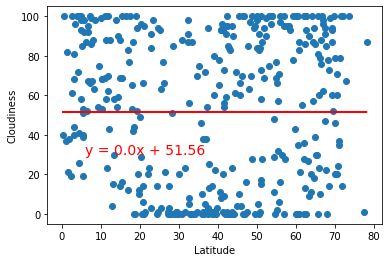

<Figure size 432x288 with 0 Axes>

In [188]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northern_cloud_lat')

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09272060444954325


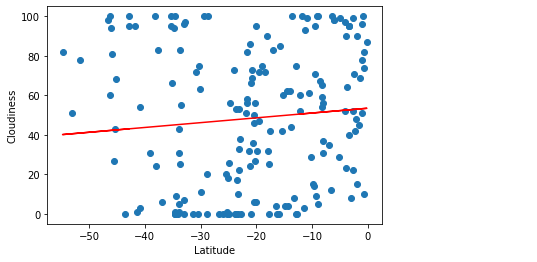

The northern hemisphere shows an extremly strong correlation between cloudiness and latitude but this could be the casuse of other third variables. The southern hemisphere shows a weak correlation between cloudiness and latitude


<Figure size 432x288 with 0 Axes>

In [189]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southern_cloud_lat')

print("The northern hemisphere shows an extremly strong correlation between cloudiness and latitude but this could be the casuse of other third variables. The southern hemisphere shows a weak correlation between cloudiness and latitude")

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10064991105095208


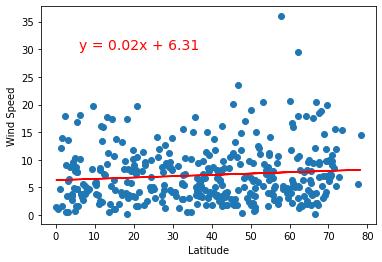

<Figure size 432x288 with 0 Axes>

In [190]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northern_wind_lat')

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24064122302371072


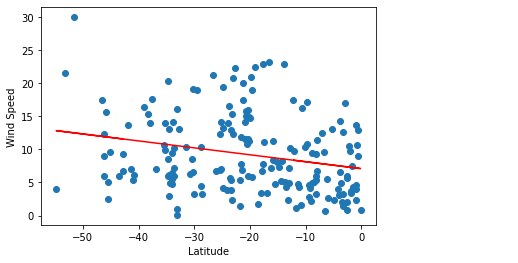

Both hemispheres show a weak r value in the regression model. This is a weak relationship between wind speed and latitude


<Figure size 432x288 with 0 Axes>

In [191]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southern_wind_lat')

print("Both hemispheres show a weak r value in the regression model. This is a weak relationship between wind speed and latitude")